Задача за DSCM006
=================

Предаваме като .ipynb в Moodle в курса DSCM006 до 15.02.2022 г.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [3]:
df_train = pd.read_csv('X_train.csv', encoding='"ISO-8859-1"')
df_test = pd.read_csv('X_test.csv', encoding='"ISO-8859-1"')

1.   Направете основен експлораторен анализ на обучителния набор;
2.   Намалете размерността на данните (PCA, correlation, VIF);
3.   Направете необходимите операции, за да присвоите на категорийните променливи числови стойности, така че те да могат да бъдат използвани в модел;
4.   Мащабирайте данните - необходимо е най-вече за SVM от моделите, които ще използвате;
5.   Използвайки кръстосана валидация с обучителния набор, намерете най-добрия модел, варирайки хиперпараметрите. Използвайте логистична регресия и метода на опорните вектори. Опитайте всички възможности за тези модели и чрез GridSearchCV или по друг начин намерете най-добрия модел като експериментирате с различни приложими метрики за оценка на точността;
6.   За SVM, scikit-learn предлага ядрата ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, които в т.5 се очаква да използвате в решението си. Освен тях, опитайте модел със сплайн ядро, което е описано [в доклад на Steve Gunn от 1998 г](http://www.svms.org/tutorials/Gunn1998.pdf). За начина на внедряване на код за ядра в sklearn можете да ползвате указанията по [тази](https://krypticmouse.hashnode.dev/training-svm-over-custom-kernels) връзка, а за реализация на сплайн ядро може да използвате [този](https://github.com/gmum/pykernels/blob/master/pykernels/regular.py) код. Ако намерите по-подходящи ядра, опитайте и с тях;
7.   *По желание.* Проучете как работи XGBoost и опитайте да решите задачата с него;
8.   След като сте избрали най-добрия модел, вижте как той се справя на тестовия набор. 

In [4]:
# 1 eksploratoren analiz na df_train
df_train.head()

,Unnamed: 0,Bad_Flag,x1,x2,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,x113,x114,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124,x125,x126,x127,x128,x129,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145,x146,x147,x148,x149,x150,x151,x152,x153,x154,x155,x156,x157,x158,x159,x160,x161,x162,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196,x197,x198,x199,x200,x201,x202,x203,x204,x205,x206,x207,x208,x209,x210,x211,x212,x213,x214,x215,x216,x217,x218,x219,x220,x221,x222,x223,x224,x225,x226,x227,x228,x229,x230,x231,x232,x233,x234,x235,x236,x237,x238,x239,x240,x241,x242,x243,x244,x245,x246,x247,x248,x249,x250,x251,x252,x253,x254,x255,x256,x257,x258,x259,x260,x261,x262,x263,x264,x265,x266,x267,x268,x269,x270,x271,x272,x273,x274,x275,x276
0,707,0,56,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,Never,Never,Never,Never,DPDCurrent,DPDCurrent,DPDCurrent,0,0,0,0,0,0.0,0.0,0.0,2428.33,0.00,0,0,963.02,0,0,0.00,1728.33,0.00,963.02,0.00,1728.33,0.00,167.61,0.00,0.0,0.00,2272.24,0.00,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0.00,0.0,0.0,167.61,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,260.83,0.00,700.22,0.00,963.02,0.00,702.19,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,963.02,0.00,700.0,0,0.0,0.0,543.91,0.0,0.0,0,0.00,0,0,0,1663.24,0,0,0.00,0,0.0,963.02,0.00,700.22,0.00,0,0.0,0.0,963.02,0.00,0,0,0,0.000000,0,0,1.000000,0,0,0.000000,0.000000,0.557197,0.000000,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,1,0,0.000000,0.000000,0.0,Yes,20.80,2012.6800,2001.600,5,20.80,2012.6800,2001.600,5,ÐÐµÐ·ÑÑÐ¾ÑÐµÐ½ ÑÑÑÐ´Ð¾Ð² Ð´Ð¾Ð³Ð¾Ð²Ð¾Ñ,01,Yes,1,1,807.877778,799.0,72332009,4910,0.0,0.0,0.0,1.0,7,364,72,364,4,364,49,364,1,1,812.316667,799.0,72332009,4910,0.0,0.0,0.0,1.0,7,183,72,183,4,183,49,183,1,1,807.877778,799.0,72332009,4910,0.0,0.0,0.0,1.0,7,91,72,91,4,91,49,91,133,377,3,Yes,0.0,NaN,Missing,0.0,0.0,0,Missing,Missing,No,2428.33,0.00,2428.33,963.02,0.00,963.02,0.00,0.00,0.00,0.00,Íå,Äà,Íå,Äà
1,5740,1,21,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,Never,Never,Never,Never,DPDCurrent,DPDCurrent,DPDCurrent,0,0,0,0,0,0.0,0.0,0.0,0.00,2300.00,0,0,0.00,0,0,1277.27,0.00,800.00,0.00,777.27,0.00,800.00,0.00,169.23,0.0,0.00,0.00,1800.00,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0.00,0.0,0.0,0.00,169.23,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,856.27,0.00,1277.27,0.00,1277.27,0.0,1500.0,0.0,500.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,1152.68,0.0,0,0.0,0.0,0.00,0.0,0.0,0,0.00,0,0,0,0.00,0,0,2133.54,0,0.0,0.00,1277.27,0.00,856.27,0,0.0,0.0,0.00,1152.68,0,0,0,1.000000,0,0,0.000000,0,0,1.000000,1.000000,0.000000,0.971588,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,0,5,0.000000,0.000000,0.0,Yes,0.00,0.0000,0.000,0,0.00,0.0000,0.000,0,Missing,Missing,No,0,0,0.000000,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,No,0.0,NaN,Missing,0.0,0.0,0,Missing,Missing,No,0.00,2300.00,2300.00,0.00,1277.27,1277.27,777.27,0.00,0.00,0.00,Äà,Íå,Íå,Íå
2,6646,0,31,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,Never,Never,Never,Never,DPDCurrent,DPDCurrent,DPDCurrent,0,0,0,0,0,0.0,0.0,0.0,8500.00,29469.17,0,0,8220.00,0,0,27234.56,7000.00,29469.17,6826.00,27234.56,7000.00,29469.32,104.49,497.93,0.0,122.11,8473.00,29469.32,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0.00,0.0,0.0,134.49,497.93,7742.0,27234.56,0.0,0.0,35.36,122.11

In [5]:
df_train.describe()

,Unnamed: 0,Bad_Flag,x1,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,x113,x114,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124,x125,x126,x127,x128,x129,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145,x146,x147,x148,x149,x150,x151,x152,x153,x154,x155,x156,x157,x158,x159,x160,x161,x162,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x185,x186,x187,x188,x189,x190,x191,x192,x196,x197,x198,x199,x200,x201,x202,x203,x204,x205,x206,x207,x208,x209,x210,x211,x212,x213,x214,x215,x216,x217,x218,x219,x220,x221,x222,x223,x224,x225,x226,x227,x228,x229,x230,x231,x232,x233,x234,x235,x236,x237,x238,x239,x240,x241,x242,x243,x244,x245,x246,x247,x248,x249,x250,x251,x252,x254,x257,x258,x259,x263,x264,x265,x266,x267,x268,x269,x270,x271,x272
count,6591.000000,6591.000000,6591.000000,6591.0,6591.0,6591.0,6591.0,6591.0,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.0,6591.0,6591.000000,6591.0,6591.0,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.0,6591.000000,6591.0,6591.0,6591.0,6591.0,6591.0,6591.0,6591.000000,6591.0,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6.591000e+03,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.00000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.0,6591.0,6591.0,6591.000000,6591.0,6591.0,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.0,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.0,6591.0,6591.000000,6591.0,6591.0,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.00000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.0,6591.0,6591.0,6591.0,6591.0,6591.0,6591.0,6591.0,6591.0,6591.000000,6591.0,6591.000000,6591.0,6591.000000,6591.0,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6.591000e+03,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6.591000e+03,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6.591000e+03,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000
mean,4404.311182,0.113792,41

In [6]:
y = df_train.Bad_Flag.values
df_train.drop(['Bad_Flag'], inplace = True, axis = 1)

In [7]:
# 2 PCA

df_train.shape

(6591, 276)

In [8]:
# Vzimame samo kolonite s chislovi stoinosti za da izpolzvame PCA
df_numerical = pd.DataFrame()
df_categorical = pd.DataFrame()
for col in df_train.columns:
    if (df_train[col].dtype == 'int64') or (df_train[col].dtype == 'float64'):
        df_numerical[col] = df_train[col]
    else:
        df_categorical[col] = df_train[col]

/tmp/ipykernel_29903/3538791448.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_numerical[col] = df_train[col]


In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
pca.fit(df_numerical)
csum = np.cumsum(pca.explained_variance_ratio_)
dimensions = np.argmax(csum >= 0.95) + 2
print(dimensions)

2


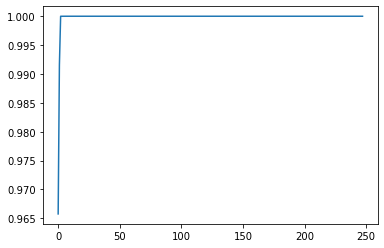

In [10]:
plt.plot(csum)

In [11]:
df_numerical.shape

(6591, 248)

In [12]:
# Standartizaciq na dannite
from sklearn.preprocessing import StandardScaler

stds = StandardScaler()

df_numerical_arr = stds.fit_transform(df_numerical)
df_numerical = pd.DataFrame(df_numerical_arr, columns = df_numerical.columns)

In [13]:
# Probvame bez nulevite koloni
for col in df_numerical.columns:
    if df_numerical[col].sum() == 0:
        df_numerical.drop([col], inplace = True, axis = 1)

In [14]:
df_numerical.shape

(6591, 204)

In [15]:
pca = PCA(n_components=None)
pca.fit(df_numerical)
csum = np.cumsum(pca.explained_variance_ratio_)
dimensions = np.argmax(csum >= 0.95) + 2
print(dimensions)

62


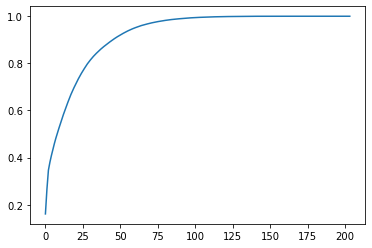

In [16]:
plt.plot(csum)

In [17]:
# Optimalniq razmer e 62
pca = PCA(n_components = dimensions)
X_pca = pca.fit_transform(df_numerical)

In [18]:
X_pca

array([[ 5.93245249e+00, -2.73751912e+00, -1.85727932e+00, ...,
         1.20581605e-02, -4.00405286e-01, -2.20184372e-01],
       [-7.89721273e+00, -9.92705323e-01,  2.58347141e+00, ...,
         1.61664055e-01,  2.67196550e-01, -2.30094730e-01],
       [ 6.91411173e+00,  5.72380603e+00,  1.20164643e+01, ...,
         6.91143682e-01,  8.01798256e-01, -1.09891382e+00],
       ...,
       [ 3.73676073e+00, -4.06761275e+00,  1.80829213e+00, ...,
         2.18701908e-02, -2.18369814e-01,  7.46093807e-02],
       [-4.96598924e+00,  5.72636998e+00, -3.62963248e+00, ...,
        -6.77274632e-03, -4.55907119e-01,  1.38172643e+00],
       [ 4.49116006e+00,  1.39489838e+01,  8.84897811e+00, ...,
        -6.85187121e-01, -1.02686625e+00,  1.76219293e+00]])

In [19]:
# 3 
df_categorical.shape

(6591, 28)

In [20]:
df_categorical.head()

,x2,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x14,x15,x16,x184,x193,x194,x195,x253,x255,x256,x260,x261,x262,x273,x274,x275,x276
0,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,Never,Never,Never,Never,DPDCurrent,DPDCurrent,DPDCurrent,Yes,ÐÐµÐ·ÑÑÐ¾ÑÐµÐ½ ÑÑÑÐ´Ð¾Ð² Ð´Ð¾Ð³Ð¾Ð²Ð¾Ñ,01,Yes,Yes,NaN,Missing,Missing,Missing,No,Íå,Äà,Íå,Äà
1,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,Never,Never,Never,Never,DPDCurrent,DPDCurrent,DPDCurrent,Yes,Missing,Missing,No,No,NaN,Missing,Missing,Missing,No,Äà,Íå,Íå,Íå
2,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,Never,Never,Never,Never,DPDCurrent,DPDCurrent,DPDCurrent,Yes,ÐÐµÐ·ÑÑÐ¾ÑÐµÐ½ ÑÑÑÐ´Ð¾Ð² Ð´Ð¾Ð³Ð¾Ð²Ð¾Ñ,01,Yes,Yes,NaN,Missing,Missing,Missing,No,Äà,Äà,Íå,Äà
3,NoDPD,DPD90,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,Never,More24M,Never,Never,DPDCurrent,DPDCurrent,DPDCurrent,Yes,ÐÐµÐ·ÑÑÐ¾ÑÐµÐ½ ÑÑÑÐ´Ð¾Ð² Ð´Ð¾Ð³Ð¾Ð²Ð¾Ñ,01,Yes,Yes,NaN,Missing,Missing,Missing,No,Íå,Äà,Íå,Äà
4,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,Never,Never,Never,Never,DPDCurrent,DPDCurrent,DPDCurrent,Yes,Missing,Missing,No,No,NaN,Missing,Missing,Missing,No,Äà,Íå,Íå,Íå


In [21]:
df_categorical.x2.unique()

array(['NoDPD', 'DPD180', 'DPD90', 'DPD181'], dtype=object)

In [22]:
df_categorical.x255.value_counts().sum()

545

In [23]:
# Proverka kakuv procent ot stoinostite v x255 e nan
100 - (54500 / 6591)

91.73114853588227

In [24]:
# nad 90% sledva kolonata da bude dropnata
df_categorical.drop(['x255'], axis = 1, inplace = True)

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df_categorical.columns:
    df_categorical[col] = le.fit_transform(df_categorical[col])

In [26]:
df_categorical

,x2,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x14,x15,x16,x184,x193,x194,x195,x253,x256,x260,x261,x262,x273,x274,x275,x276
0,3,3,3,3,1,2,1,2,2,2,2,0,0,0,0,4,0,1,1,0,0,0,0,1,0,1,0
1,3,3,3,3,1,2,1,2,2,2,2,0,0,0,0,0,20,0,0,0,0,0,0,0,1,1,1
2,3,3,3,3,1,2,1,2,2,2,2,0,0,0,0,4,0,1,1,0,0,0,0,0,0,1,0
3,3,2,3,3,1,2,1,2,1,2,2,0,0,0,0,4,0,1,1,0,0,0,0,1,0,1,0
4,3,3,3,3,1,2,1,2,2,2,2,0,0,0,0,0,20,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6586,3,3,3,2,1,2,1,2,2,2,1,0,0,0,0,4,0,1,1,0,0,0,0,0,1,1,1
6587,3,3,3,3,1,2,1,2,2,2,2,0,0,0,0,4,0,1,1,0,0,0,0,1,0,1,0
6588,3,3,3,1,1,2,1,2,2,2,1,0,0,0,0,7,11,1,1,0,0,0,0,0,1,1,1
6589,3,3,2,2,1,2,1,2,2,1,1,0,0,0,0,5,5,1,0,0,0,0,0,1,0,1,0


In [27]:
# 4 standartizaciq: Z = x - mu / sigma | mu - mean value, sigma - standard deviation
from sklearn.preprocessing import StandardScaler

stds = StandardScaler()

X_pca = stds.fit_transform(X_pca)

In [28]:
X_pca

array([[ 1.03498609, -0.59462717, -0.45462683, ...,  0.01643128,
        -0.57236548, -0.32042675],
       [-1.37776161, -0.21562938,  0.63238491, ...,  0.22029458,
         0.38194821, -0.33484895],
       [ 1.20624808,  1.24329015,  2.94140304, ...,  0.9418    ,
         1.14614283, -1.59921152],
       ...,
       [ 0.65192185, -0.88354197,  0.44263569, ...,  0.02980183,
        -0.31215208,  0.10857647],
       [-0.86637521,  1.24384707, -0.88846534, ..., -0.00922901,
        -0.65170343,  2.01077899],
       [ 0.78353568,  3.02991297,  2.16606236, ..., -0.93368318,
        -1.46786973,  2.56445881]])

In [29]:
X = np.hstack([X_pca, df_categorical.iloc[:, :].values])

In [30]:
X.shape

(6591, 89)

In [31]:
y = y.reshape(-1, 1)
y.shape

(6591, 1)

In [32]:
# 5 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [38]:
lr = LogisticRegression()
accuracy_lr = cross_val_score(estimator = lr, X = X, y = y, cv = 5).mean()
accuracies = []
cores = ['linear', 'poly', 'rbf', 'sigmoid'] #, "precomputed" #(X trqbva da e kvadratna matrica za precomputed qdro )

for core in cores:
    svc = SVC(C = 1, kernel = core)
    accuracies.append(cross_val_score(estimator = svc, X = X, y = y, cv = 5).mean())

/home/nasko/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nasko/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/nasko/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [39]:
accuracies

[0.8860567105488707, 0.8852978701619036, 0.886208455617156, 0.8161053402989573]

In [40]:
accuracy_lr

0.8816565637507608

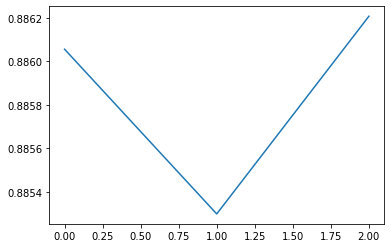

In [42]:
plt.plot(accuracies[0:3])

In [74]:
# Vijda se che nai-golqmata tochnost spored cross_val_score e na tretiq model -> qdro rbf
svc_optimal = SVC(kernel = "rbf")

In [48]:
# 6
from abc import abstractmethod, ABCMeta

class Kernel(object):
    """
    Base, abstract kernel class
    """
    __metaclass__ = ABCMeta

    def __call__(self, data_1, data_2):
        return self._compute(data_1, data_2)

    @abstractmethod
    def _compute(self, data_1, data_2):
        """
        Main method which given two lists data_1 and data_2, with
        N and M elements respectively should return a kernel matrix
        of size N x M where K_{ij} = K(data_1_i, data_2_j)
        """
        raise NotImplementedError('This is an abstract class')

    def gram(self, data):
        """
        Returns a Gramian, kernel matrix of matrix and itself
        """
        return self._compute(data, data)

    @abstractmethod
    def dim(self):
        """
        Returns dimension of the feature space
        """
        raise NotImplementedError('This is an abstract class')

    def __str__(self):
        return self.__class__.__name__

    def __repr__(self):
        return str(self)

    def __add__(self, kernel):
        return KernelSum(self, kernel)

    def __mul__(self, value):
        if isinstance(value, Kernel):
            return KernelProduct(self, value)
        else:
            if isinstance(self, ScaledKernel):
                return ScaledKernel(self._kernel, self._scale * value)
            else:
                return ScaledKernel(self, value)

    def __rmul__(self, value):
        return self.__mul__(value)

    def __div__(self, scale):
        return ScaledKernel(self, 1./scale)

    def __pow__(self, value):
        return KernelPower(self, value)

class PositiveKernel(Kernel):
    """
    Defines kernels which can be only used with positive values
    """
    __metaclass__ = ABCMeta

class Spline(PositiveKernel):
    """
    Spline kernel, 
        K(x, y) = PROD_i 1 + x_iy_i + x_iy_i min(x_i,y_i)
                           - (x_i+y_i)/2 * min(x_i,y_i)^2
                           + 1/3 * min(x_i, y_i)^3
    as defined in
    "Support Vector Machines for Classification and Regression"
    Steve Gunn
    ISIS Technical Report
    http://www.svms.org/tutorials/Gunn1998.pdf
    """

    def _compute(self, data_1, data_2):

        if np.any(data_1 < 0) or np.any(data_2 < 0):
            warnings.warn('Spline kernel requires data to be strictly positive!')

        kernel = np.ones((data_1.shape[0], data_2.shape[0]))

        for d in range(data_1.shape[1]):
            column_1 = data_1[:, d].reshape(-1, 1)
            column_2 = data_2[:, d].reshape(-1, 1)
            c_prod = column_1 * column_2.T
            c_sum = column_1 + column_2.T
            c_min = np.minimum(column_1, column_2.T)
            kernel *= 1. + c_prod + c_prod * c_min \
                         - c_sum/2. * c_min ** 2. \
                         + 1./3. * c_min ** 3.
        return kernel

    def dim(self):
        return None

In [49]:
spline_core = Spline()

In [50]:
svc_spline = SVC(C = 1, kernel = spline_core)

In [51]:
spline_acc = cross_val_score(estimator = svc, X = X, y = y, cv = 5).mean()

/home/nasko/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nasko/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nasko/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nasko/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [52]:
spline_acc

0.8161053402989573

In [53]:
# Vijda se che spline qdroto se predstavq po-zle ot drugite qdra, dori i ot LogReg modela

In [54]:
# 7 XGBoost
from sklearn.ensemble import GradientBoostingClassifier

xgbc = GradientBoostingClassifier()

In [55]:
n_estimatorss = [1, 10, 100, 1000]
learning_rates = [0.01, 0.1, 1, 10]
max_depths = [0.5, 1, 2, 5]
accuracies_xgbc = []
# 10, 0.1, 5
for est in n_estimatorss:
    for lr in learning_rates:
        for depth in max_depths:
            xgbc = GradientBoostingClassifier(n_estimators=est, learning_rate=lr, max_depth=depth, random_state=101)
            accuracies_xgbc.append(cross_val_score(estimator = xgbc, X = X, y = y, cv = 5).mean())

/home/nasko/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nasko/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nasko/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nasko/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

In [57]:
for i, ele in enumerate(accuracies_xgbc):
    accuracies_xgbc[i] = ele.mean()

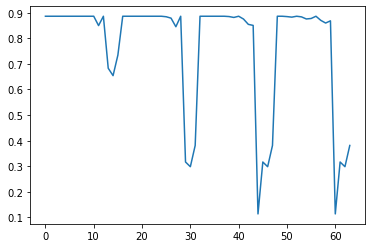

In [59]:
plt.plot(accuracies_xgbc)

In [63]:
accuracies_xgbc.index(max(accuracies_xgbc))

23

In [64]:
# 24-tata kombinaciq ot parametri e optimalnata, tova e 24-tata iteraciq =>
xgbc_optimal = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, max_depth=5)

In [65]:
# 9 izprobvane na testov set s izbranite modeli i sravnqvane na rezultatite po acc_score i f1_score
from sklearn.metrics import f1_score, accuracy_score

In [68]:
df_test = pd.read_csv('X_test.csv', delimiter = ',', encoding = 'iso-8859-1')

In [72]:
y_test = df_test.Bad_Flag.values

In [73]:
df_test.drop(['Bad_Flag'], inplace = True, axis = 1)

In [75]:
# Vzimame samo kolonite s chislovi stoinosti za da izpolzvame PCA
df_numerical = pd.DataFrame()
df_categorical = pd.DataFrame()
for col in df_test.columns:
    if (df_test[col].dtype == 'int64') or (df_test[col].dtype == 'float64'):
        df_numerical[col] = df_test[col]
    else:
        df_categorical[col] = df_test[col]

/tmp/ipykernel_29903/3271902694.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_numerical[col] = df_test[col]


In [76]:
# Standartizaciq na dannite
from sklearn.preprocessing import StandardScaler

stds = StandardScaler()

df_numerical_arr = stds.fit_transform(df_numerical)
df_numerical = pd.DataFrame(df_numerical_arr, columns = df_numerical.columns)

In [77]:
for col in df_numerical.columns:
    if df_numerical[col].sum() == 0:
        df_numerical.drop([col], inplace = True, axis = 1)

In [78]:
pca = PCA(n_components = dimensions)
X_test_pca = pca.fit_transform(df_numerical)

In [79]:
X_test_pca.shape

(2197, 62)

In [82]:
df_categorical.drop(['x255'], inplace = True, axis = 1)

In [83]:
for col in df_categorical.columns:
    df_categorical[col] = le.fit_transform(df_categorical[col])

In [84]:
df_categorical.head()

,x2,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x14,x15,x16,x184,x193,x194,x195,x253,x256,x260,x261,x262,x273,x274,x275,x276
0,3,3,3,3,1,2,1,2,2,2,2,0,0,0,0,4,0,1,1,0,0,0,0,0,0,1,0
1,3,3,3,3,1,2,1,2,2,2,2,0,0,0,0,4,0,1,0,1,1,2,1,0,0,1,0
2,3,3,3,3,1,2,1,2,2,2,2,0,0,0,0,0,16,0,0,0,0,0,0,1,0,1,1
3,3,3,3,1,1,2,1,2,2,2,1,0,0,0,0,0,16,0,0,0,0,0,0,0,1,1,1
4,3,3,3,3,1,2,1,2,2,2,2,0,0,0,0,4,0,1,1,0,0,0,0,1,0,1,0


In [85]:
X_test = np.hstack([X_test_pca, df_categorical.iloc[:, :].values])

In [86]:
X_test.shape

(2197, 89)

In [87]:
X.shape

(6591, 89)

In [88]:
y_test.shape

(2197,)

In [89]:
y_test = y_test.reshape(-1, 1)

In [93]:
accuracy_dict = {}
lr = LogisticRegression()
for model in [xgbc_optimal, svc_optimal, lr]:
    model.fit(X, y)
    y_pred = model.predict(X_test)
    accuracy_dict.update({model : {"F1" : f1_score(y_test, y_pred),
                                    "Acc_Score" : accuracy_score(y_test, y_pred)}})

/home/nasko/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nasko/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nasko/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nasko/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMI

In [94]:
accuracy_dict

{GradientBoostingClassifier(max_depth=5, n_estimators=10): {'F1': 0.0,
  'Acc_Score': 0.8857532999544834},
 SVC(): {'F1': 0.0, 'Acc_Score': 0.8862084660901229},
 LogisticRegression(): {'F1': 0.07024793388429752,
  'Acc_Score': 0.7951752389622212}}